# Water Quality; Potability


https://www.kaggle.com/datasets/nayanack/water-probability/code

[Import libraries](#Import-libraries)

[Data cleansing and preparation](#Data-cleansing-and-preparation)

- [EDA](#EDA)
- [Train and Test](#Train-and-Test)

ML models:

1. [Logistic regression](#Logistic-regression)
2. [KNN](#KNN)
3. [Random Forest](#Random-forest)
4. [Decision Tree](#Decision-Tree)
5. [XGBoost](#XGBoost)

[Conclusion](#Conclusion)

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Data cleansing and preparation

In [6]:
df_original = pd.read_csv('water_potability.csv')

In [9]:
df = df_original.copy()

In [12]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [26]:
df.duplicated().sum()

0

In [11]:


df.isnull().sum()/len(df)*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [13]:
nulls =  df[df.isnull().any(axis=1)]
nulls

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [15]:
# Fill NA using a KNN model 


from sklearn.impute import KNNImputer

columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity', 
                       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Sulfate']

# KNN imputer
imputer = KNNImputer(n_neighbors=5)
df[columns] = imputer.fit_transform(df[columns])
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.156857  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  336.094350    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  330.449166    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [32]:
# another option less accurate could be using the mean

mean_values = df.mean()
df = df.fillna(mean_values)

# Another option is removing NA rows
df = df.dropna()

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [27]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [19]:
X = pd.DataFrame(X, columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'])

In [21]:
X = df.loc[:,df.columns != 'Potability']
y = df.loc[:,'Potability']

## EDA

In [33]:
matriz = X.corr()

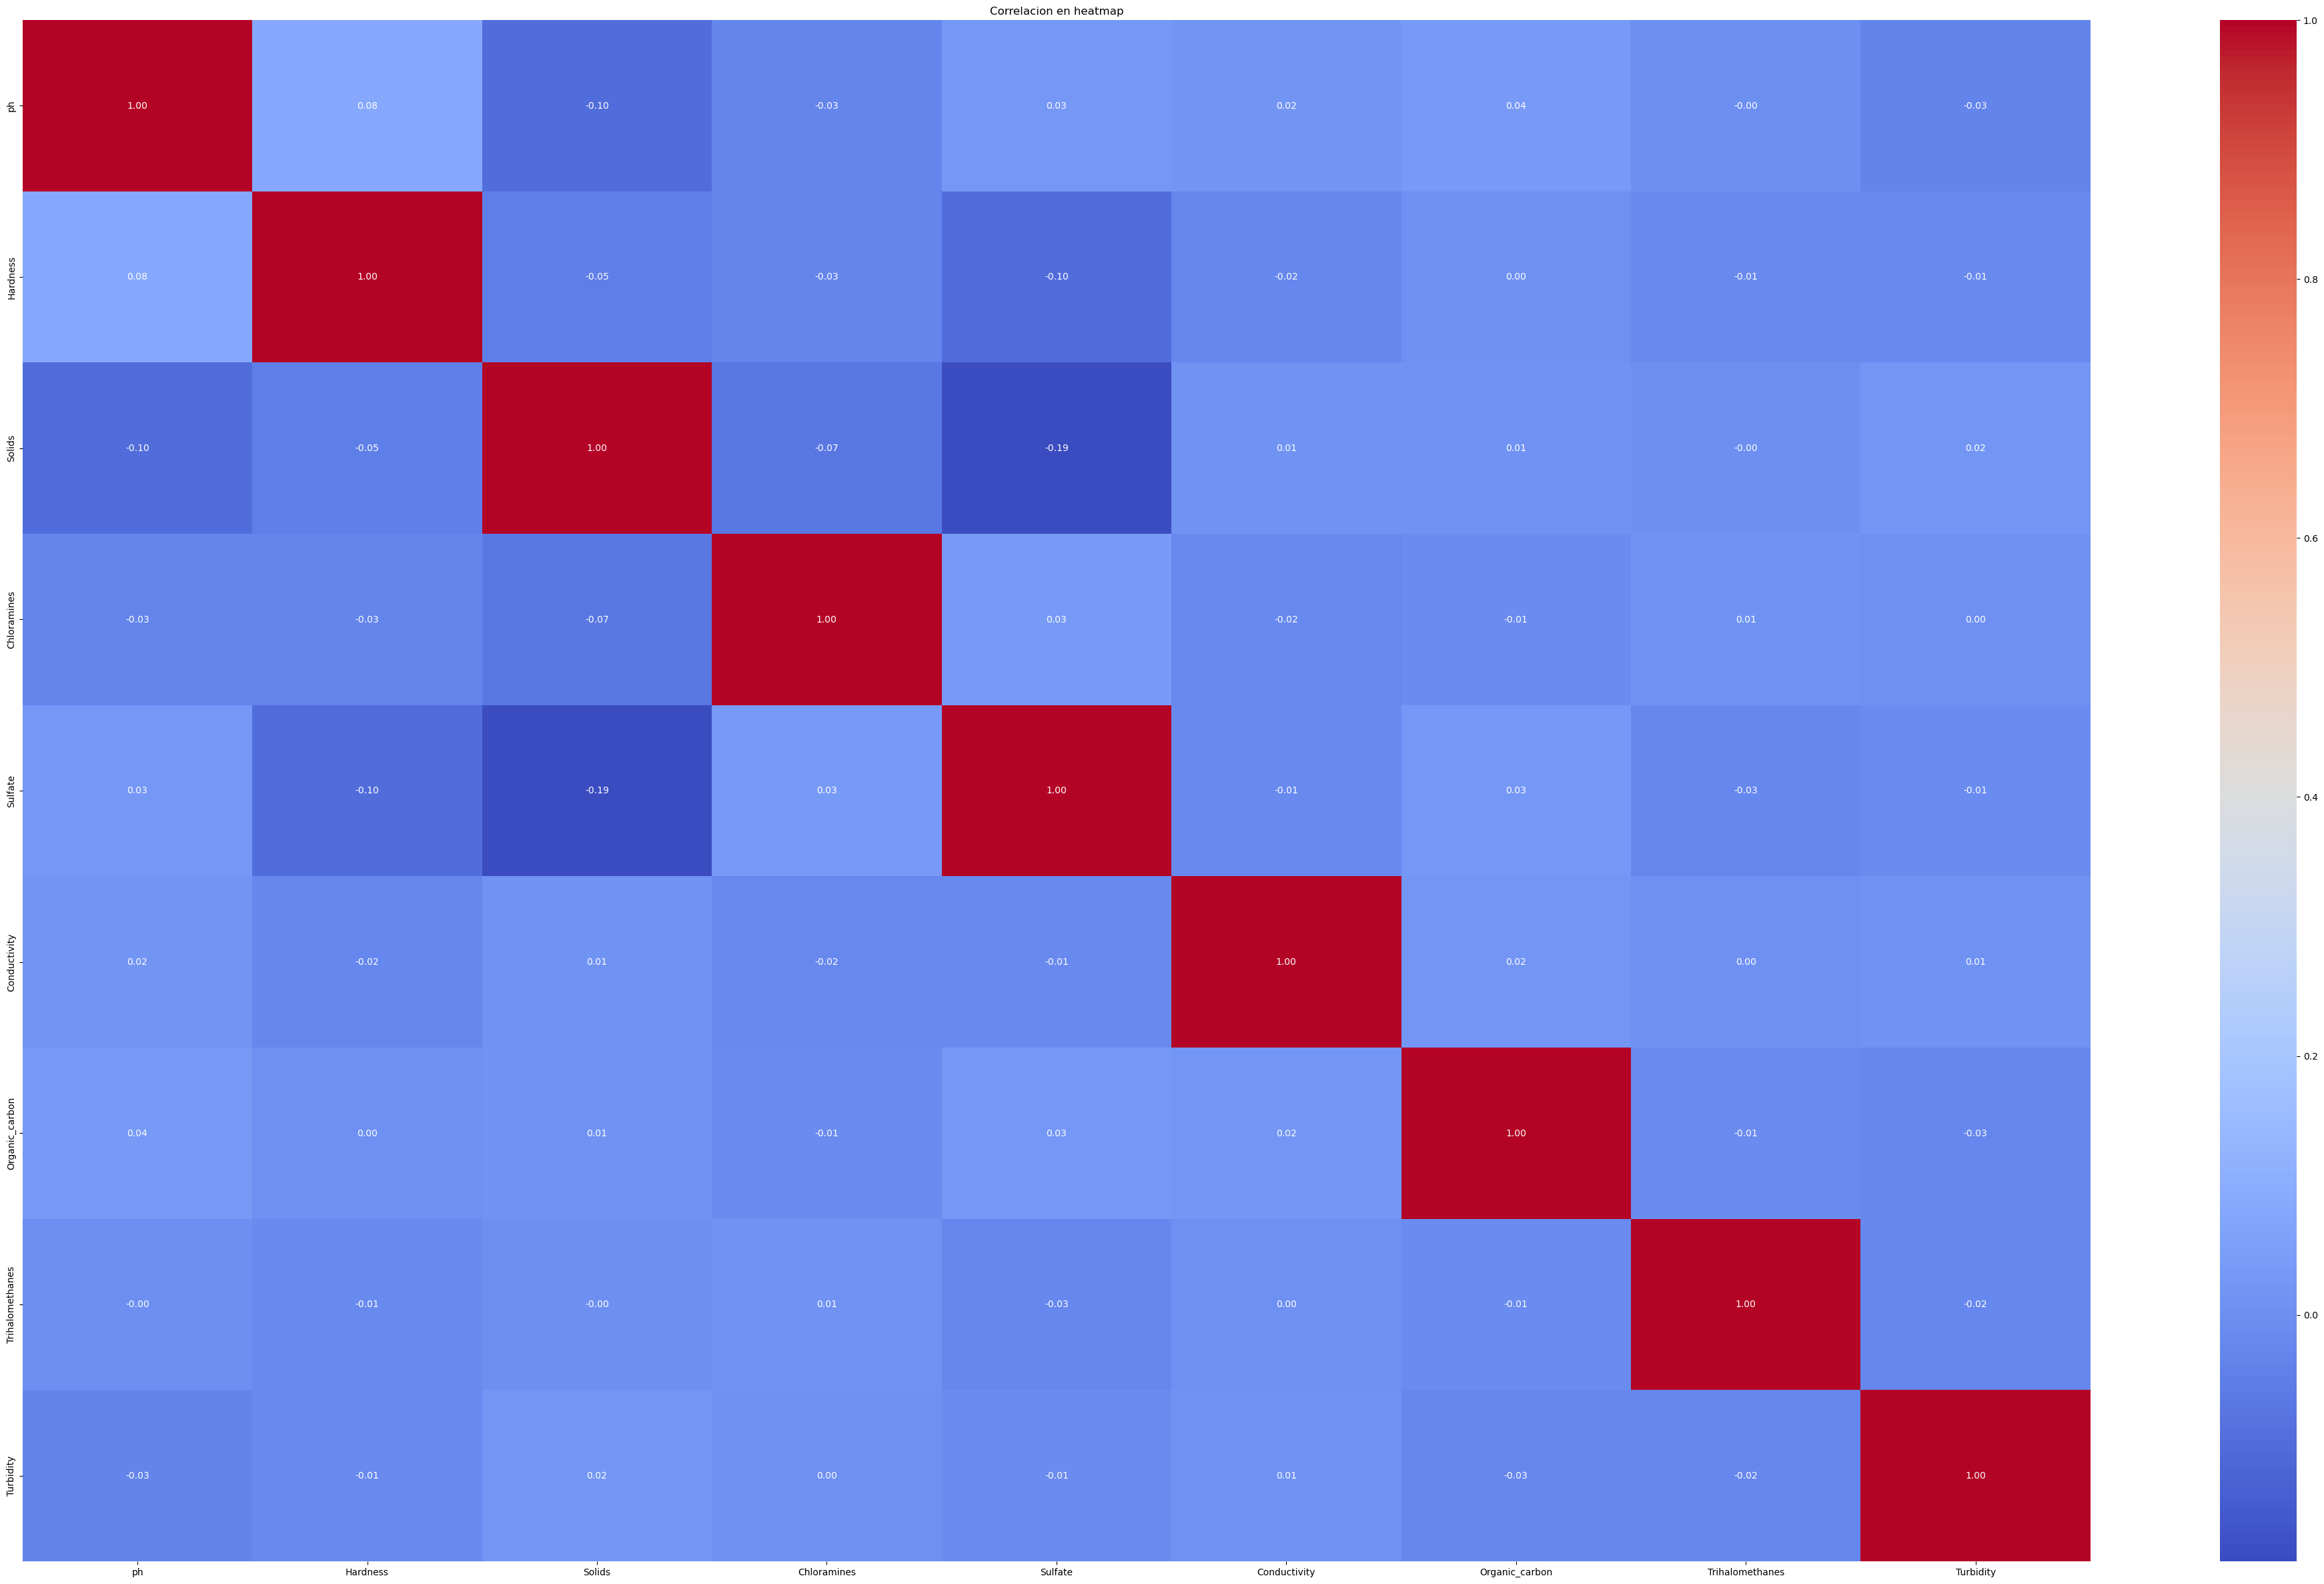

In [35]:
plt.figure(figsize=(50, 30))
sns.heatmap(matriz, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlacion en heatmap')
plt.show()

We see it would be not useful to apply PCAs to this dataset.

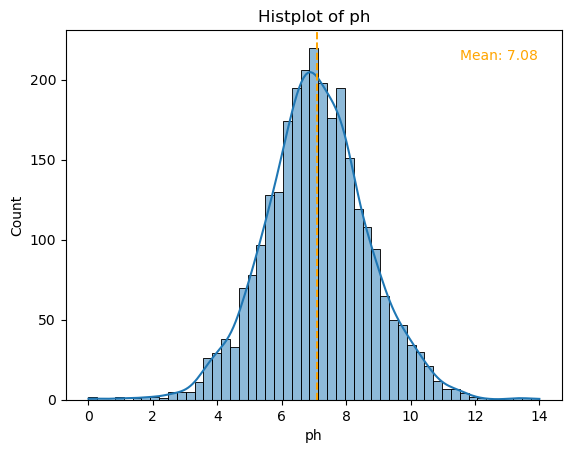

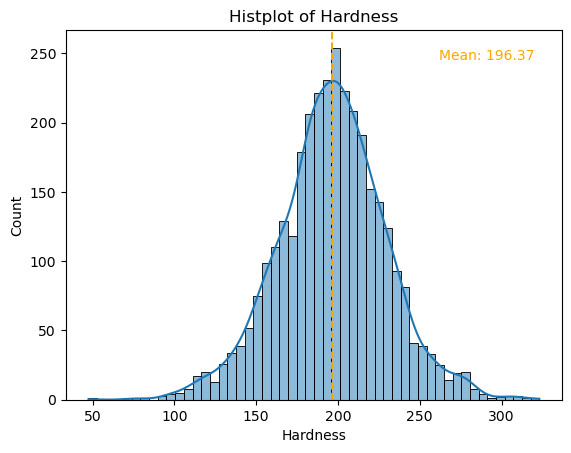

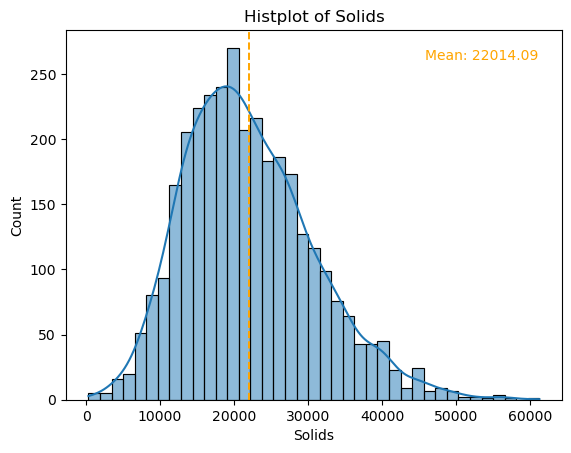

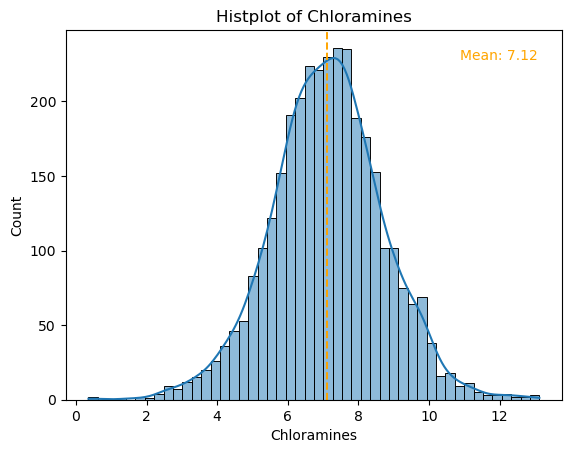

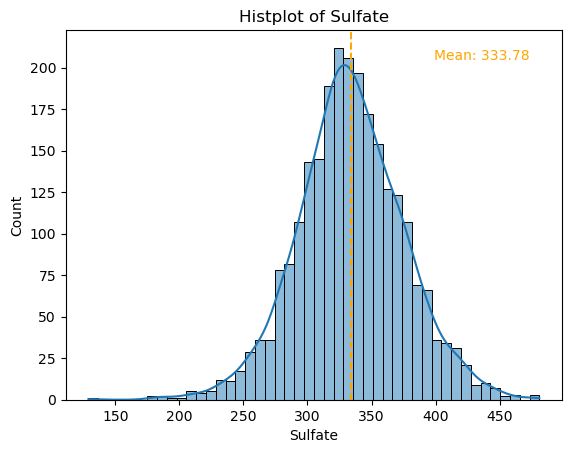

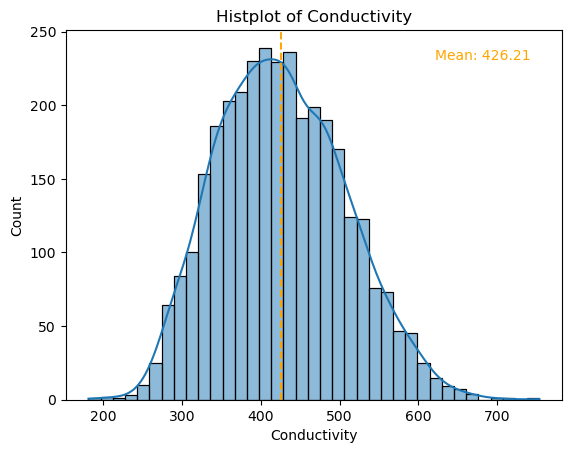

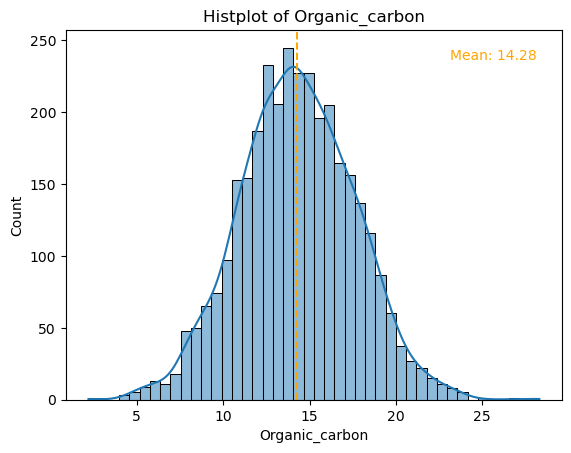

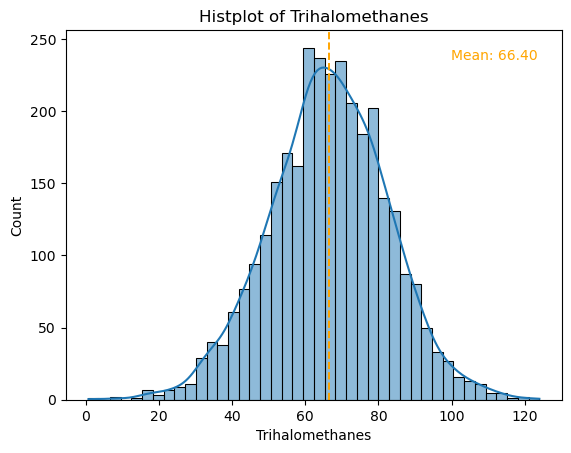

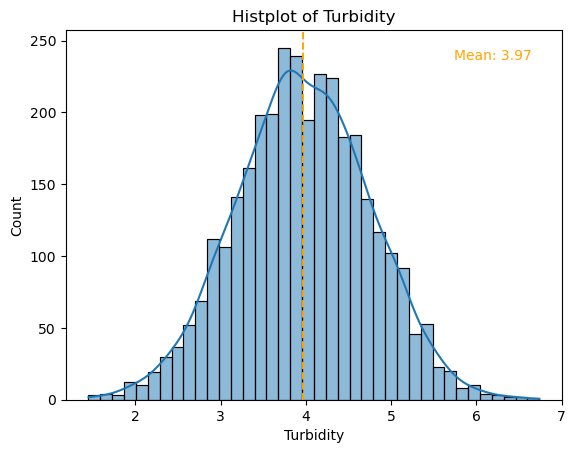

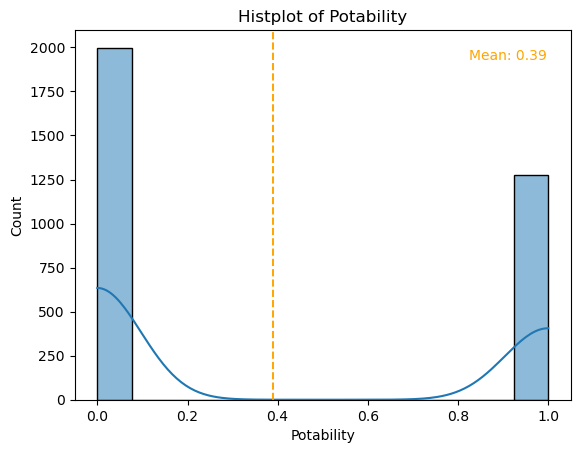

In [23]:
for col in df_original.columns:
    mean_value = df_original[col].mean()
    sns.histplot(df_original[col], kde = True)
    plt.title(f'Histplot of {col}')
    plt.axvline(x=mean_value, color='orange', linestyle='--', linewidth=1.4, label=f'Mean: {mean_value:.2f}')
    plt.text(plt.xlim()[1]*0.95, plt.ylim()[1]*0.95, f'Mean: {mean_value:.2f}', color='orange', ha='right', va='top', fontsize=10)
    plt.show()

C:\Users\deepn\AppData\Local\Temp\ipykernel_12196\3968353840.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[1], x='Potability', data=df, palette=['red', 'blue'])


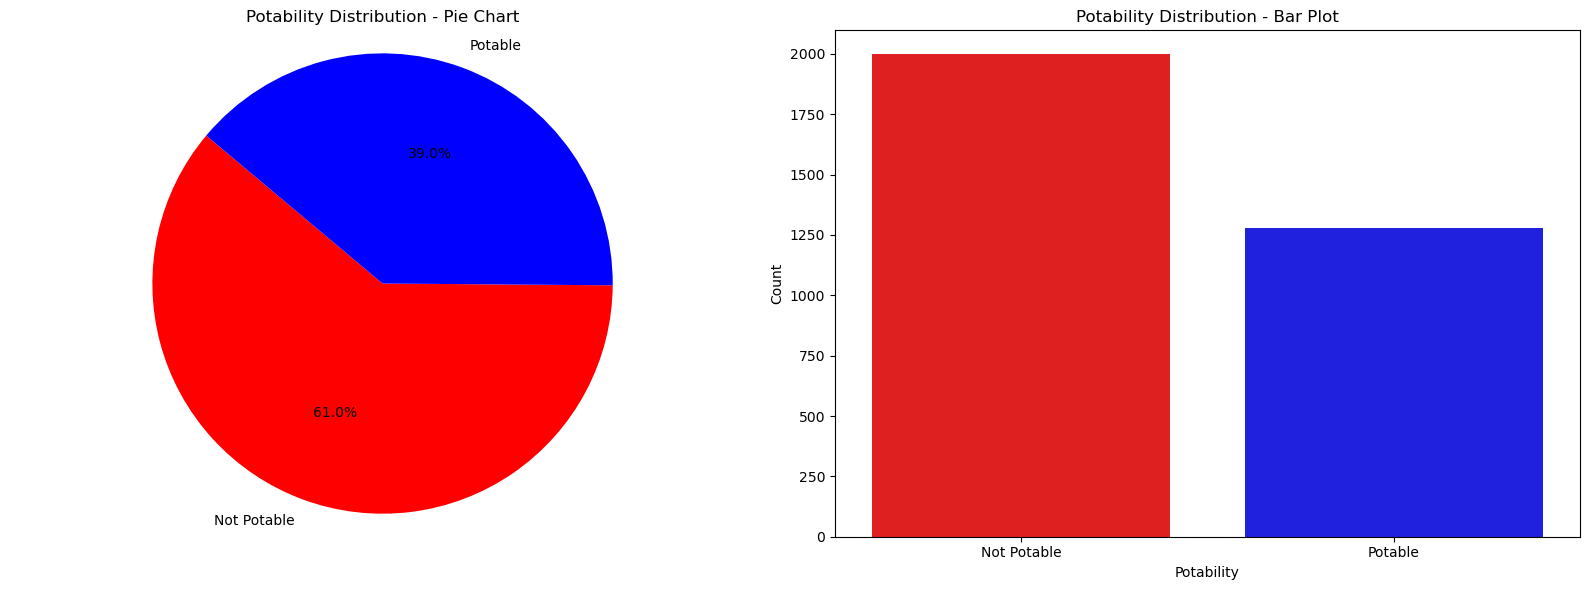

In [39]:
# Count the number of records for each category
counts = df['Potability'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
labels = ['Not Potable', 'Potable']
sizes = [counts[0], counts[1]]
axs[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'blue'])
axs[0].axis('equal')  # Ensure the pie chart is circular
axs[0].set_title('Potability Distribution - Pie Chart')

# Bar plot
sns.countplot(ax=axs[1], x='Potability', data=df, palette=['red', 'blue'])
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Not Potable', 'Potable'])
axs[1].set_xlabel('Potability')
axs[1].set_ylabel('Count')
axs[1].set_title('Potability Distribution - Bar Plot')

# Show the plots
plt.tight_layout()
plt.show()

## Train and test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size = 0.75,
                                                    test_size = 0.25)

# Logistic regression

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
modelo = LogisticRegression(max_iter = 1000000)

In [37]:
results = []

for n_features in range(2,10):
    
    seleccion_RFE = RFE(modelo, n_features_to_select=n_features)
    seleccion_RFE.fit(X_train, y_train)
    
    X_train_final = X_train.loc[:,seleccion_RFE.support_]
    X_test_final = X_test.loc[:,seleccion_RFE.support_]
    
    modelo.fit(X_train_final, y_train)
    
    y_pred = modelo.predict(X_test_final)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append((n_features, accuracy))

for result in results:
    print(f"Number of features: {result[0]}, Accuracy: {result[1]:.2f}")

Number of features: 2, Accuracy: 0.61
Number of features: 3, Accuracy: 0.61
Number of features: 4, Accuracy: 0.61
Number of features: 5, Accuracy: 0.61
Number of features: 6, Accuracy: 0.61
Number of features: 7, Accuracy: 0.61
Number of features: 8, Accuracy: 0.61
Number of features: 9, Accuracy: 0.61


In [35]:
seleccion_RFE = RFE(modelo, n_features_to_select = 9)
seleccion_RFE

RFE(estimator=LogisticRegression(max_iter=1000000), n_features_to_select=9)

In [49]:
# Fit model with train data

seleccion_RFE.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000000), n_features_to_select=9)

In [51]:
# which columns to select

seleccion_RFE.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [53]:
X_train_final = X_train.loc[:,seleccion_RFE.support_]

In [55]:
modelo = LogisticRegression(max_iter = 1000000)
modelo.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000000)

In [57]:
X_test_final = X_test.loc[:,seleccion_RFE.support_]

In [59]:
y_prediction = modelo.predict(X_test_final)

In [61]:
y_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
y_prediction_proba = modelo.predict_proba(X_test_final)
y_prediction_proba

array([[0.62223723, 0.37776277],
       [0.64829924, 0.35170076],
       [0.60491372, 0.39508628],
       ...,
       [0.61683268, 0.38316732],
       [0.61411709, 0.38588291],
       [0.61347004, 0.38652996]])

In [63]:
# [:,1] te quedas con el elemento 1 que es la probabilidad de que sea 1(si)

y_prediction_proba = modelo.predict_proba(X_test_final)[:,1]
y_prediction_proba

array([0.41058954, 0.36582398, 0.39251909, 0.37786418, 0.40587758,
       0.40710891, 0.38609987, 0.39603129, 0.36516828, 0.38747344,
       0.42474577, 0.41420903, 0.39254007, 0.37635775, 0.38077971,
       0.37206329, 0.38573781, 0.37566535, 0.38403633, 0.34603007,
       0.37310817, 0.39276684, 0.37324864, 0.37972217, 0.38432428,
       0.35367922, 0.41023806, 0.38577768, 0.37032538, 0.40210451,
       0.36566881, 0.40111646, 0.38562424, 0.39757873, 0.38087442,
       0.40611089, 0.38941748, 0.41078026, 0.37925813, 0.40129379,
       0.36605896, 0.39342346, 0.36937215, 0.38325403, 0.38257835,
       0.34618944, 0.3821977 , 0.38756913, 0.3970864 , 0.38386338,
       0.4017311 , 0.37062192, 0.36949567, 0.3982599 , 0.36337546,
       0.38358927, 0.37217048, 0.38139298, 0.41759634, 0.38507295,
       0.40592261, 0.39834353, 0.39223319, 0.35762378, 0.3595794 ,
       0.41468633, 0.36655041, 0.38870394, 0.38553023, 0.37070292,
       0.39721677, 0.39730761, 0.40527897, 0.41435804, 0.42299

In [65]:
# Use this vector to determine where you want the cutoff to consider yes or no
# Multiply by 1 so that they become 0 and 1 instead of True or False
# Chose 0.8 as it is important to be at least 80% sure that the water is potable

y_prediccion_final = (y_prediction_proba>0.8)*1
y_prediccion_final 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [69]:
matriz_confusion = confusion_matrix(y_test, y_prediccion_final)

In [71]:
pd.DataFrame({
    "y_test": y_test,
    "y_prediccion_final": y_prediccion_final
}).groupby(["y_test", "y_prediccion_final"]).size().reset_index()

,y_test,y_prediccion_final,0
0,0,0,500
1,1,0,319


In [73]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

In [75]:
# Accuracy

(TN + TP)/ (TN + TP + FN + FP)

0.6105006105006106

# KNN

In [38]:
from sklearn import neighbors

In [26]:
k = 5
modelo = neighbors.KNeighborsClassifier(n_neighbors=k)
modelo.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = modelo.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [41]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[358, 143],
       [222,  96]], dtype=int64)

In [43]:
pd.DataFrame({
    "y_test": y_test,
    "y_prediccion_final": y_pred
}).groupby(["y_test", "y_prediccion_final"]).size().reset_index()

,y_test,y_prediccion_final,0
0,0,0,358
1,0,1,143
2,1,0,222
3,1,1,96


In [50]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

# Accuracy

(TN + TP)/ (TN + TP + FN + FP)

0.5543345543345544

In [46]:
(matriz_confusion[0][0] + matriz_confusion[1][1])/ matriz_confusion.sum()

0.5543345543345544

# Random forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
# Create model

modeloRF = RandomForestClassifier()

# Fit model

modeloRF.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
y_pred = modeloRF.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [83]:
accuracy_score(y_test, y_pred)

0.6776556776556777

In [87]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modeloRF, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Cross-Validation Scores: [0.66260163 0.66869919 0.66598778 0.65173116 0.65784114]
Mean Score: 0.661372178894905
Standard Deviation: 0.00603187900749019


# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [28]:
modeloTree = DecisionTreeClassifier()
modeloTree.fit(X_train, y_train)


DecisionTreeClassifier()

In [30]:
y_pred = modeloTree.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.6019536019536019

# XGBoost

In [89]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
y_pred = model.predict(X_test)

In [95]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[395, 105],
       [193, 126]], dtype=int64)

In [97]:
pd.DataFrame({
    "y_test": y_test,
    "y_prediccion_final": y_pred
}).groupby(["y_test", "y_prediccion_final"]).size().reset_index()

,y_test,y_prediccion_final,0
0,0,0,395
1,0,1,105
2,1,0,193
3,1,1,126


In [99]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

# Accuracy

(TN + TP)/ (TN + TP + FN + FP)

0.6361416361416361

# Conclusion 

The highest achieved accuracy among the machine learning models utilized was 67% with the Random Forest classifier. However, this performance falls short of the stringent requirements necessary for determining water potability from a health perspective, which typically necessitates accuracies exceeding 90%. Achieving such high accuracy mandates the inclusion of more comprehensive and relevant features, particularly those pertaining to microbiological, chemical, and heavy metal compositions in water quality assessments. These additional parameters are essential for enhancing the model's predictive capability and ensuring its suitability for safeguarding public health against potential waterborne contaminants.

Even with these parameters, it is essential to compare the results against regulatory standards such as those set by the WHO, EPA, or other relevant health authorities. Regular testing and monitoring are critical for ensuring water remains safe over time.

In summary, while this dataset includes several important parameters, adding the microbiological, chemical, and heavy metal tests will provide a more accurate assessment of water potability.